# Student Mental Health Analysis

#### Goal: Explore patterns in depression, anxiety, panic attacks, CGPA, year of study and help seeking behavior

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [2]:
df = pd.read_csv("C:\\Users\\user\\OneDrive\\Desktop\\Projects\\analytics and ml project\\student_mental_health\\data\\raw\\Student Mental health.csv")
df.head()

Timestamp Choose your gender   Age What is your course?  \
0  8/7/2020 12:02             Female  18.0          Engineering   
1  8/7/2020 12:04               Male  21.0    Islamic education   
2  8/7/2020 12:05               Male  19.0                  BIT   
3  8/7/2020 12:06             Female  22.0                 Laws   
4  8/7/2020 12:13               Male  23.0         Mathemathics   

  Your current year of Study What is your CGPA? Marital status  \
0                     year 1        3.00 - 3.49             No   
1                     year 2        3.00 - 3.49             No   
2                     Year 1        3.00 - 3.49             No   
3                     year 3        3.00 - 3.49            Yes   
4                     year 4        3.00 - 3.49             No   

  Do you have Depression? Do you have Anxiety? Do you have Panic attack?  \
0                     Yes                   No                       Yes   
1                      No                  Yes                        No   
2                     Yes                  Yes                       Yes   
3                     Yes                   No                        No   
4                      No                   No                        No   

  Did you seek any specialist for a treatment?  
0                                           No  
1                                           No  
2                                           No  
3                                           No  
4                                           No

In [3]:
df.head()
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

Timestamp Choose your gender        Age What is your course?  \
count              101                101  100.00000                  101   
unique              92                  2        NaN                   49   
top     8/7/2020 12:39             Female        NaN                  BCS   
freq                 3                 75        NaN                   18   
mean               NaN                NaN   20.53000                  NaN   
std                NaN                NaN    2.49628                  NaN   
min                NaN                NaN   18.00000                  NaN   
25%                NaN                NaN   18.00000                  NaN   
50%                NaN                NaN   19.00000                  NaN   
75%                NaN                NaN   23.00000                  NaN   
max                NaN                NaN   24.00000                  NaN   

       Your current year of Study What is your CGPA? Marital status  \
count                         101                101            101   
unique                          7                  6              2   
top                        year 1        3.50 - 4.00             No   
freq                           41                 47             85   
mean                          NaN                NaN            NaN   
std                           NaN                NaN            NaN   
min                           NaN                NaN            NaN   
25%                           NaN                NaN            NaN   
50%                           NaN                NaN            NaN   
75%                           NaN                NaN            NaN   
max                           NaN                NaN            NaN   

       Do you have Depression? Do you have Anxiety? Do you have Panic attack?  \
count                      101                  101                       101   
unique                       2                    2                         2   
top                         No                   No                        No   
freq                        66                   67                        68   
mean                       NaN                  NaN                       NaN   
std                        NaN                  NaN                       NaN   
min                        NaN                  NaN                       NaN   
25%                        NaN                  NaN                       NaN   
50%                        NaN                  NaN                       NaN   
75%                        NaN                  NaN                       NaN   
max                        NaN                  NaN                       NaN   

       Did you seek any specialist for a treatment?  
count                                           101  
unique                                            2  
top                                              No  
freq                                             95  
mean                                            NaN  
std                                             NaN  
min                                             NaN  
25%                                             NaN  
50%                                             NaN  
75%                                             NaN  
max                                             NaN

#### Cleaning

In [4]:
df = df.rename(columns={
    'Choose your gender':'Gender',
    'What is your course?':'Course',
    'Your current year of Study':'Year',
    'What is your CGPA?':'CGPA',
    'Do you have Depression?':'Depression',
    'Do you have Anxiety?':'Anxiety',
    'Do you have Panic attack?':'Panic Attack',
    'Did you seek any specialist for a treatment?':'Seeking Specialist'
})
df

Timestamp  Gender   Age              Course    Year  \
0         8/7/2020 12:02  Female  18.0         Engineering  year 1   
1         8/7/2020 12:04    Male  21.0   Islamic education  year 2   
2         8/7/2020 12:05    Male  19.0                 BIT  Year 1   
3         8/7/2020 12:06  Female  22.0                Laws  year 3   
4         8/7/2020 12:13    Male  23.0        Mathemathics  year 4   
..                   ...     ...   ...                 ...     ...   
96   13/07/2020 19:56:49  Female  21.0                 BCS  year 1   
97   13/07/2020 21:21:42    Male  18.0         Engineering  Year 2   
98   13/07/2020 21:22:56  Female  19.0            Nursing   Year 3   
99   13/07/2020 21:23:57  Female  23.0    Pendidikan Islam  year 4   
100  18/07/2020 20:16:21    Male  20.0  Biomedical science  Year 2   

            CGPA Marital status Depression Anxiety Panic Attack  \
0    3.00 - 3.49             No        Yes      No          Yes   
1    3.00 - 3.49             No         No     Yes           No   
2    3.00 - 3.49             No        Yes     Yes          Yes   
3    3.00 - 3.49            Yes        Yes      No           No   
4    3.00 - 3.49             No         No      No           No   
..           ...            ...        ...     ...          ...   
96   3.50 - 4.00             No         No     Yes           No   
97   3.00 - 3.49             No        Yes     Yes           No   
98   3.50 - 4.00            Yes        Yes      No          Yes   
99   3.50 - 4.00             No         No      No           No   
100  3.00 - 3.49             No         No      No           No   

    Seeking Specialist  
0                   No  
1                   No  
2                   No  
3                   No  
4                   No  
..                 ...  
96                  No  
97                  No  
98                  No  
99                  No  
100                 No  

[101 rows x 11 columns]

In [5]:
df.isnull().sum()
df = df.dropna(subset=['Age'])

In [6]:
df.isnull().sum()


Timestamp             0
Gender                0
Age                   0
Course                0
Year                  0
CGPA                  0
Marital status        0
Depression            0
Anxiety               0
Panic Attack          0
Seeking Specialist    0
dtype: int64

#### Exploratory Data Analysis (EDA)

<Axes: >

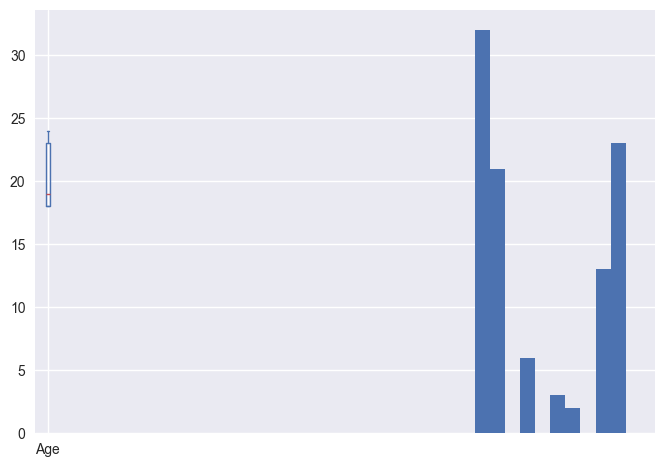

In [7]:
#Numerical
df['Age'].hist()
df['Age'].plot(kind='box')

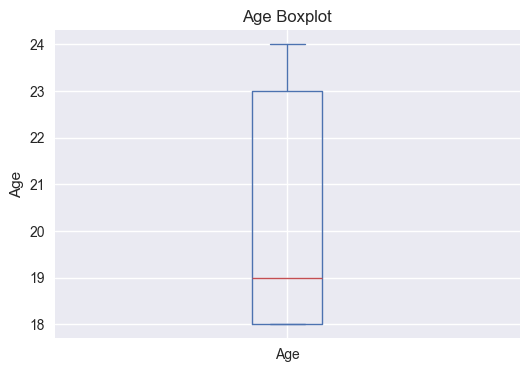

In [8]:
plt.figure(figsize=(6,4))
df['Age'].plot(kind='box')
plt.title('Age Boxplot')
plt.ylabel('Age')
plt.show()

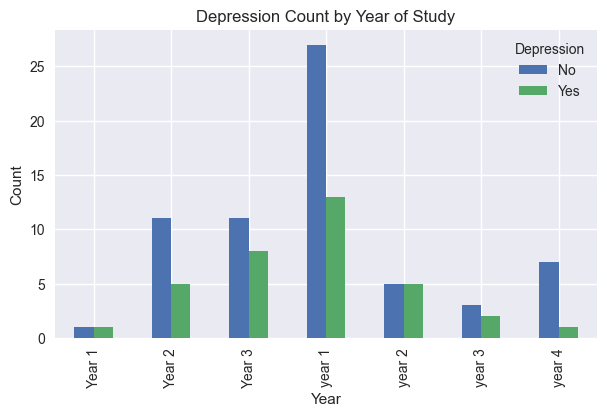

In [9]:
pd.crosstab(df['Year'],df['Depression']).plot(kind='bar',figsize=(7,4))
plt.title('Depression Count by Year of Study')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Gender'>

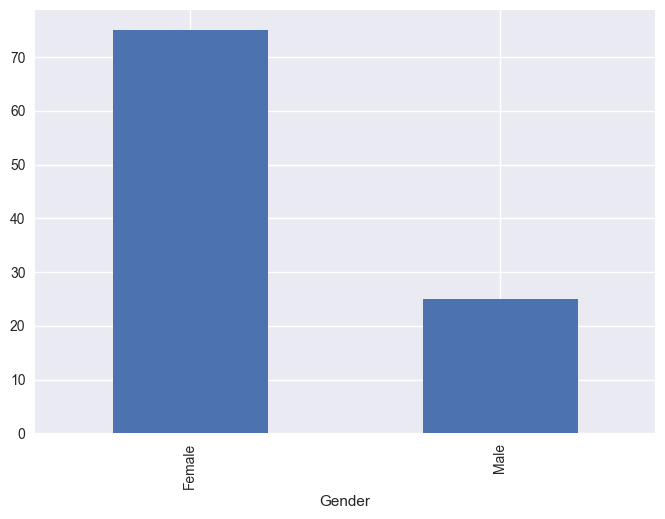

In [10]:
df['Gender'].value_counts()
df['Gender'].value_counts().plot(kind='bar')

#### Bivariate Analysis

<Axes: xlabel='Age', ylabel='CGPA'>

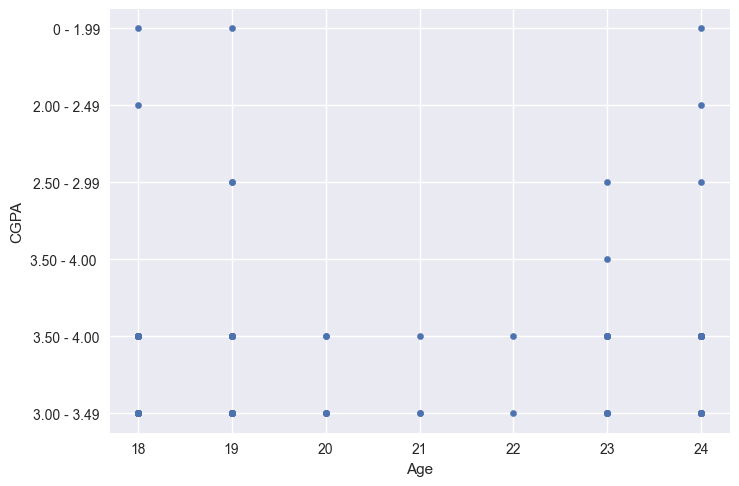

In [11]:
#NUmerical vs Numerical
df.plot.scatter(x='Age',y='CGPA')

In [12]:
#Catergorical vs Numerical
df.groupby('Gender')['Age'].mean()

Gender
Female    20.533333
Male      20.520000
Name: Age, dtype: float64

In [13]:
#Categorical vs Categorical
pd.crosstab(df['Gender'], df['Depression'])

Depression  No  Yes
Gender             
Female      46   29
Male        19    6

#### Correlation

<Axes: >

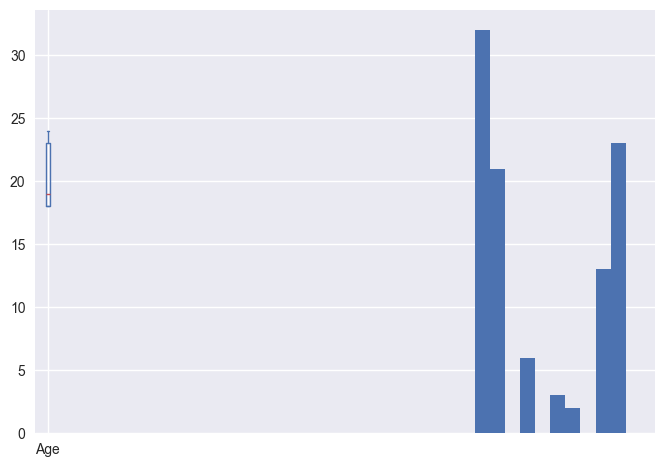

In [14]:
df['Age'].hist()
df['Age'].plot(kind='box')

<Axes: xlabel='Anxiety'>

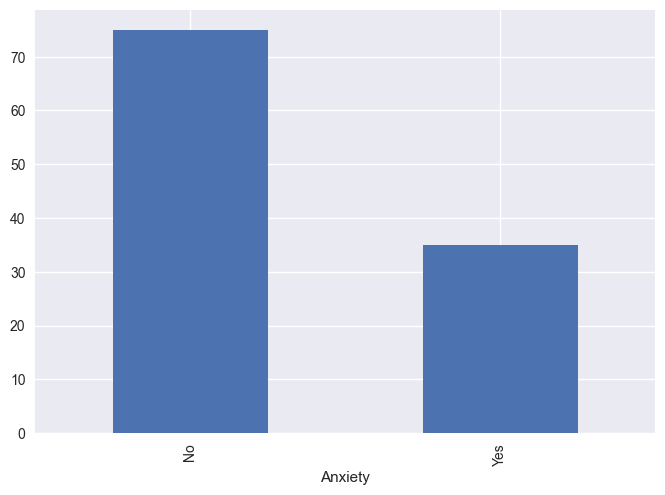

In [15]:
df['Gender'].value_counts().plot(kind='bar')
df['Depression'].value_counts().plot(kind='bar')
df['Anxiety'].value_counts().plot(kind='bar')

In [16]:
pd.crosstab(df['Gender'], df['Depression'])
pd.crosstab(df['Course'], df['Depression'])


Depression               No  Yes
Course                          
ALA                       0    1
Accounting                1    0
BCS                      13    5
BENL                      0    2
BIT                       4    5
Banking Studies           1    0
Benl                      1    0
Biomedical science        4    0
Biotechnology             1    0
Business Administration   1    0
CTS                       1    0
Communication             0    1
DIPLOMA TESL              1    0
Diploma Nursing           1    0
ENM                       0    1
Econs                     0    1
Engine                    2    0
Engineering              10    7
Fiqh                      1    0
Fiqh fatwa                1    0
Human Resources           1    0
Human Sciences            1    0
IT                        1    0
Irkhs                     1    0
Islamic Education         1    0
Islamic education         1    0
KENMS                     1    0
KIRKHS                    1    0
KOE                       3    1
Kirkhs                    1    0
Koe                       1    0
Kop                       1    0
Law                       0    1
Laws                      1    1
MHSC                      0    1
Malcom                    0    1
Marine science            0    1
Mathemathics              1    0
Nursing                   0    1
Pendidikan Islam          1    0
Pendidikan Islam          1    0
Pendidikan islam          0    1
Psychology                1    0
Radiography               1    0
TAASL                     1    0
Usuluddin                 0    1
engin                     1    0
koe                       0    1
psychology                0    2

In [17]:
pd.crosstab(df['Gender'],df['Depression'],normalize='index')*100

Depression         No        Yes
Gender                          
Female      61.333333  38.666667
Male        76.000000  24.000000

<Axes: xlabel='Age', ylabel='CGPA'>

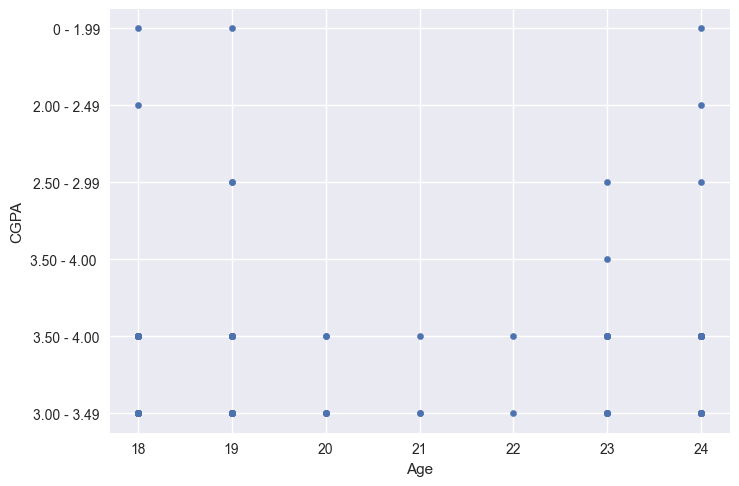

In [18]:
df.plot(kind='scatter', x='Age', y='CGPA')

Encoding Categorical Columns 

In [19]:
df_encoded=pd.get_dummies(df,drop_first=True)
df_corr = df_encoded.corr()

#heatmap visualization
df_corr.style.background_gradient(cmap='coolwarm')

In [20]:
df.columns

Index(['Timestamp', 'Gender', 'Age', 'Course', 'Year', 'CGPA',
       'Marital status', 'Depression', 'Anxiety', 'Panic Attack',
       'Seeking Specialist'],
      dtype='object')

In [21]:
df=df.drop(columns=[col for col in df.columns if "Timestamp" in col])

In [22]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_corr = df_encoded.corr()
df_corr.style.background_gradient(cmap='coolwarm')


<Axes: >

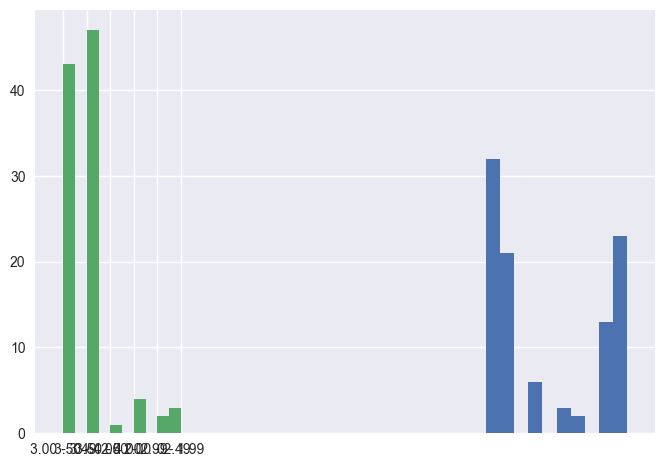

In [23]:
df.describe()
df['Age'].hist()
df['CGPA'].hist()

<Axes: xlabel='Gender'>

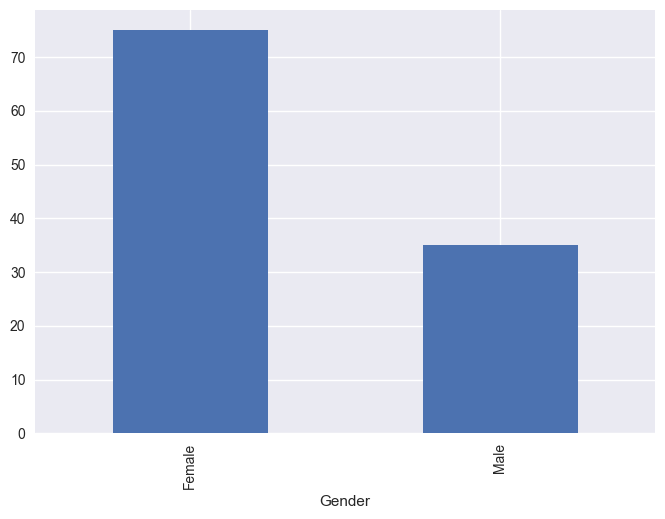

In [24]:
df['Depression'].value_counts()
df['Depression'].value_counts().plot(kind='bar')
df['Anxiety'].value_counts().plot(kind='bar')
df['Gender'].value_counts().plot(kind='bar')


<Axes: xlabel='Panic Attack'>

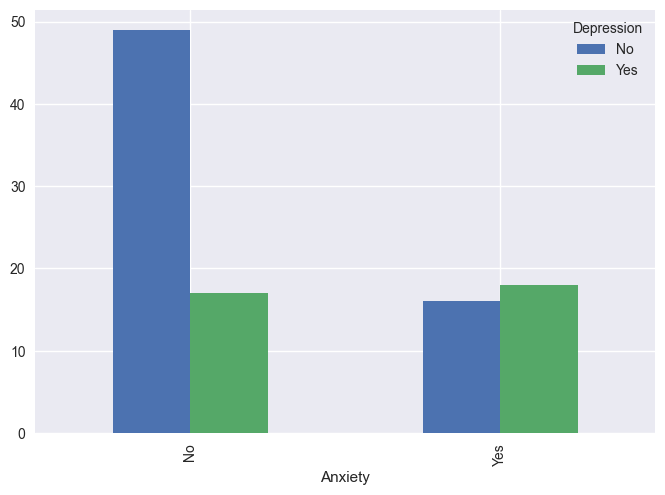

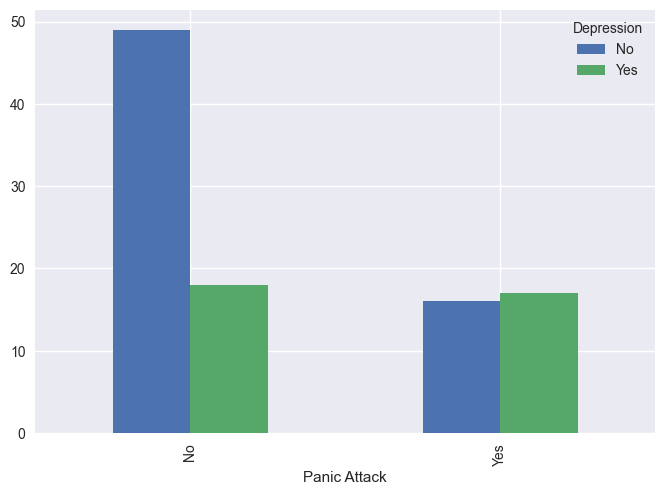

In [25]:
pd.crosstab(df['Anxiety'], df['Depression']).plot(kind='bar')
pd.crosstab(df['Panic Attack'], df['Depression']).plot(kind='bar')



<Axes: xlabel='Panic Attack'>

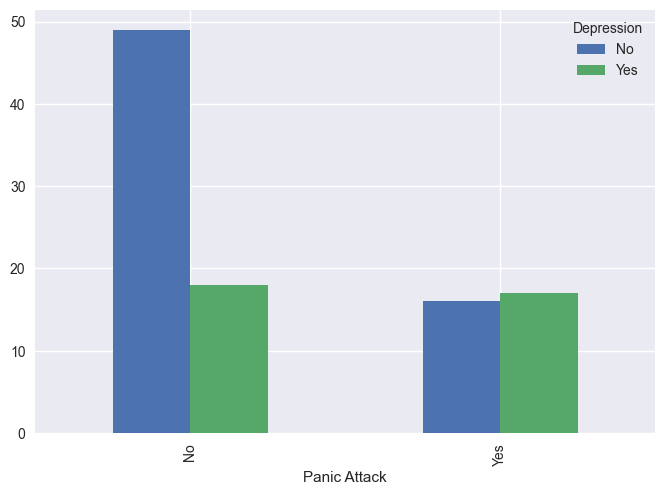

In [26]:
pd.crosstab(df['Panic Attack'], df['Depression']).plot(kind='bar')


In [27]:
pd.crosstab(df['Panic Attack'], df['Depression'], normalize='index') * 100


Depression           No        Yes
Panic Attack                      
No            73.134328  26.865672
Yes           48.484848  51.515152

<Axes: xlabel='Year'>

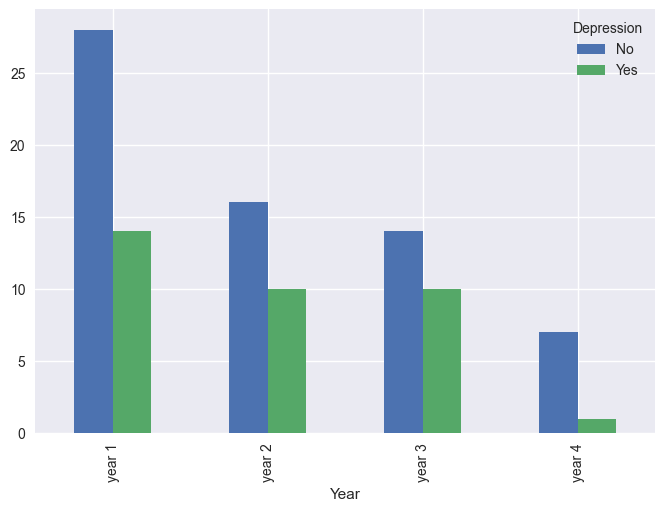

In [28]:
df['Year'] = df['Year'].str.strip().str.lower()
pd.crosstab(df['Year'], df['Depression']).plot(kind='bar')



In [29]:
pd.crosstab(df['Year'],df['Depression'],normalize='index')*100

Depression         No        Yes
Year                            
year 1      66.666667  33.333333
year 2      61.538462  38.461538
year 3      58.333333  41.666667
year 4      87.500000  12.500000

Percentage of Students who have depression or not by Year of study

<Axes: xlabel='Course'>

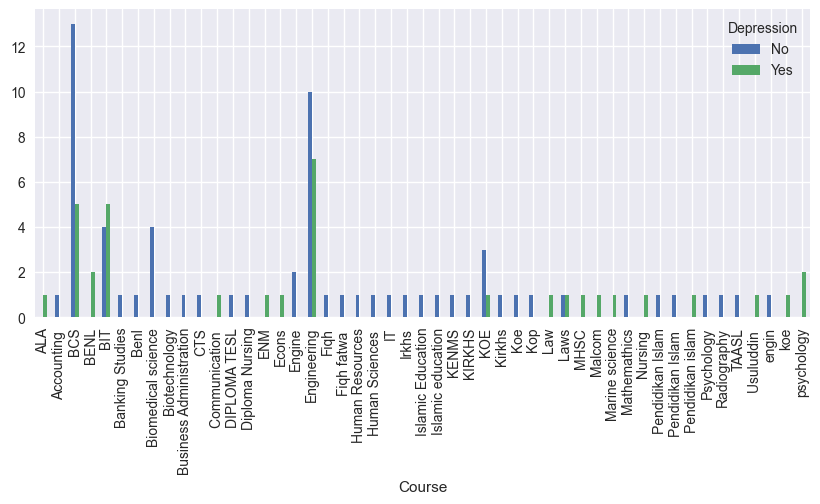

In [30]:
pd.crosstab(df['Course'], df['Depression']).plot(kind='bar', figsize=(10,4))


In [31]:
pd.crosstab(df['Course'],df['Depression'], normalize='index')*100

Depression                       No         Yes
Course                                         
ALA                        0.000000  100.000000
Accounting               100.000000    0.000000
BCS                       72.222222   27.777778
BENL                       0.000000  100.000000
BIT                       44.444444   55.555556
Banking Studies          100.000000    0.000000
Benl                     100.000000    0.000000
Biomedical science       100.000000    0.000000
Biotechnology            100.000000    0.000000
Business Administration  100.000000    0.000000
CTS                      100.000000    0.000000
Communication              0.000000  100.000000
DIPLOMA TESL             100.000000    0.000000
Diploma Nursing          100.000000    0.000000
ENM                        0.000000  100.000000
Econs                      0.000000  100.000000
Engine                   100.000000    0.000000
Engineering               58.823529   41.176471
Fiqh                     100.000000    0.000000
Fiqh fatwa               100.000000    0.000000
Human Resources          100.000000    0.000000
Human Sciences           100.000000    0.000000
IT                       100.000000    0.000000
Irkhs                    100.000000    0.000000
Islamic Education        100.000000    0.000000
Islamic education        100.000000    0.000000
KENMS                    100.000000    0.000000
KIRKHS                   100.000000    0.000000
KOE                       75.000000   25.000000
Kirkhs                   100.000000    0.000000
Koe                      100.000000    0.000000
Kop                      100.000000    0.000000
Law                        0.000000  100.000000
Laws                      50.000000   50.000000
MHSC                       0.000000  100.000000
Malcom                     0.000000  100.000000
Marine science             0.000000  100.000000
Mathemathics             100.000000    0.000000
Nursing                    0.000000  100.000000
Pendidikan Islam         100.000000    0.000000
Pendidikan Islam         100.000000    0.000000
Pendidikan islam           0.000000  100.000000
Psychology               100.000000    0.000000
Radiography              100.000000    0.000000
TAASL                    100.000000    0.000000
Usuluddin                  0.000000  100.000000
engin                    100.000000    0.000000
koe                        0.000000  100.000000
psychology                 0.000000  100.000000

<Axes: xlabel='Seeking Specialist'>

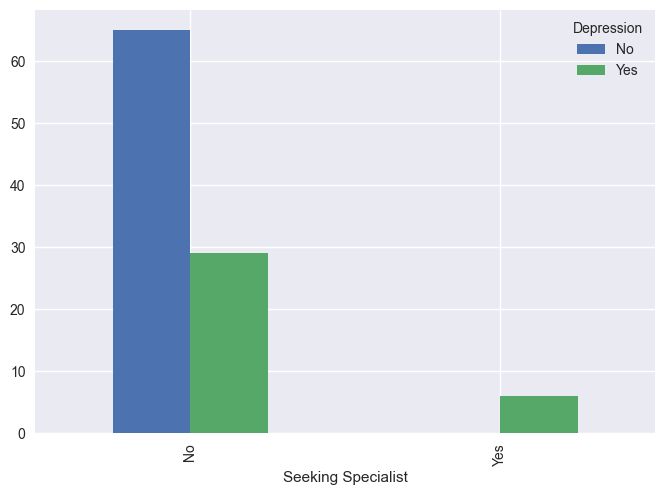

In [32]:
pd.crosstab(df['Seeking Specialist'], df['Depression']).plot(kind='bar')


In [33]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [34]:
df_corr=df_encoded.corr()
df_corr.style

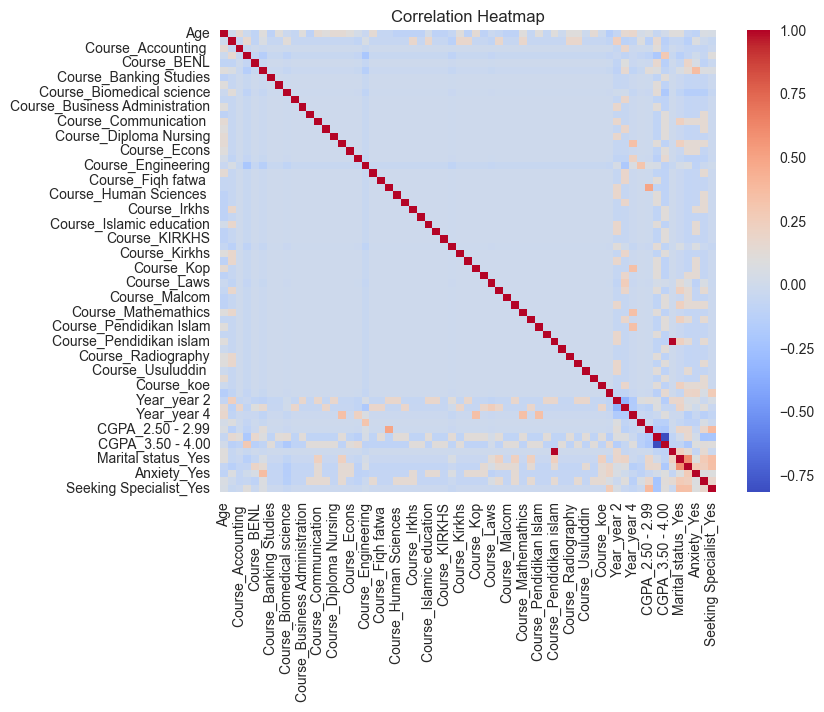

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(df_encoded.corr(), annot=False,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Correlation Heatmap Explanation

The correlation heatmap shows how different variables in the dataset are related to each other. Since most of the columns are categorical, they were first converted into numeric form using one-hot encoding. After encoding, the heatmap helps visualize whether any factor strongly predicts depression.

#### Key Observations

- There is no strong correlation between CGPA and Depression, meaning academic performance is not a major predictor.

- Anxiety, Panic Attack, and Depression show partial correlation, but not strong enough to say one directly causes the other.

- Course, Year, and Gender show very weak or no correlation with Depression.

- Overall, the heatmap suggests that no single variable strongly explains depression, highlighting how mental health is influenced by many complex factors.

In [36]:
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              100 non-null    object 
 1   Age                 100 non-null    float64
 2   Course              100 non-null    object 
 3   Year                100 non-null    object 
 4   CGPA                100 non-null    object 
 5   Marital status      100 non-null    object 
 6   Depression          100 non-null    object 
 7   Anxiety             100 non-null    object 
 8   Panic Attack        100 non-null    object 
 9   Seeking Specialist  100 non-null    object 
dtypes: float64(1), object(9)
memory usage: 8.6+ KB


Age
count  100.00000
mean    20.53000
std      2.49628
min     18.00000
25%     18.00000
50%     19.00000
75%     23.00000
max     24.00000

#### Insights

- Anxiety and panic attacks show partial overlap with depression, but none of them perfectly predict each other.

- First-year students show the highest number of depression cases, but because year-wise sample sizes are small, percentage differences aren’t strong enough to claim one year is “most depressed.”

- Depression appears across all streams. Many streams have very few students, so stream-wise percentages become misleading. The course doesn’t show a meaningful relationship with depression.

- CGPA does not show any meaningful correlation with depression, suggesting academic performance is not a strong indicator.

- A large number of students who report depression are not seeking professional help.

#### Limitations


- Sample size of many streams are too small to generalize.
- The dataset relies on self-reported mental,which maybe under or over reported.
- Correlation does not imply causation.

#### Conclusion

Overall, depression in this dataset appears influenced by multiple factors with no single variable showing strong predictive power